In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from tensorflow import keras
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model

In [0]:
#kyle = np.load('drive/My Drive/kyles.npy')
tyler = np.load('drive/My Drive/tyler.npy')
cage = np.load('drive/My Drive/cages.npy')

In [4]:
## encoder
e1 = keras.layers.Conv2D(16,(3,3),activation='relu', padding='same', input_shape=(175,175,3))
#e1.trainable=False

e2 = keras.layers.MaxPooling2D((2,2), padding='same')
#e2.trainable=False

e3 = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')
#e3.trainable=False

e4 = keras.layers.MaxPooling2D((2,2), padding='same')
#e4.trainable=False

e5 = keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')
#e5.trainable=False

## latent face
core = keras.layers.MaxPooling2D((2,2), padding='same')
#core.trainable=False


##decoder
d1 = keras.layers.Conv2D(64,(3,3),activation='relu', padding='same', input_shape=(22, 22, 64))
d2 = keras.layers.UpSampling2D((2,2))
d3 = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')
d4 = keras.layers.UpSampling2D((2,2))
d5 = keras.layers.Conv2D(16,(3,3), activation='relu', padding='same')
d6 = keras.layers.UpSampling2D((2,2))

out = keras.layers.Conv2D(3,(2,2), activation='sigmoid', padding='valid')


## add layers to sequential model
# model = keras.Sequential()
# model.add(e1)
# model.add(e2)
# model.add(e3)
# model.add(e4)
# model.add(e5)
# model.add(core)


# model.add(d1)
# model.add(d2)
# model.add(d3)
# model.add(d4)
# model.add(d5)
# model.add(d6)
# model.add(out)

def encoder():
  model = keras.Sequential()
  model.add(e1)
  model.add(e2)
  model.add(e3)
  model.add(e4)
  model.add(e5)
  model.add(core)
  return model

def decoder():
  model = keras.Sequential()
  model.add(d1)
  model.add(d2)
  model.add(d3)
  model.add(d4)
  model.add(d5)
  model.add(d6)
  model.add(out)
  return model

W0828 21:19:48.593864 140152871487360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
encoder = encoder()
decoder = decoder()

model = keras.Sequential()
model.add(encoder)
model.add(decoder)

In [6]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 175, 175, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 88, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
____________________________________________________

In [7]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 32)        18464     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 88, 88, 16)        4624      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 176, 176, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 175, 175, 3)      

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 22, 22, 64)        23584     
_________________________________________________________________
sequential_1 (Sequential)    (None, 175, 175, 3)       60211     
Total params: 83,795
Trainable params: 83,795
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mse')

In [10]:
model.fit(tyler,tyler,epochs=100,batch_size=100)


Epoch 1/100
1789/1789 [==============================] - 10s 5ms/sample - loss: 0.0477
Epoch 2/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0194
Epoch 3/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0085
Epoch 4/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0062
Epoch 5/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0051
Epoch 6/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0046
Epoch 7/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0040
Epoch 8/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0038
Epoch 9/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0035
Epoch 10/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0034
Epoch 11/100
1789/1789 [==============================] - 6s 3ms/sample - loss: 0.0032
Epoch 12/100
1789/1789 [===========================

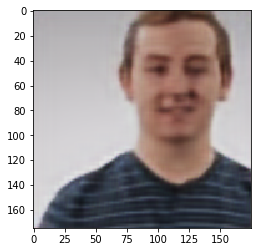

In [11]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(model.predict(np.array([tyler[850]]))[0],cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
encoder.save_weights('drive/My Drive/tyler_encoder1.h5')

In [0]:
decoder.save_weights('drive/My Drive/tyler_decoder1.h5')

In [0]:
encoder.load_weights('drive/My Drive/tyler_encoder1.h5')

In [0]:
decoder.load_weights('drive/My Drive/tyler_decoder1.h5')

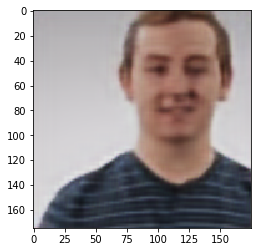

In [16]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([tyler[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
cage_encoded = encoder.predict(cage)

In [19]:
decoder.compile(optimizer='adam', loss='mse')
decoder.fit(cage_encoded, cage, epochs=100, batch_size=100)

Epoch 1/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0072
Epoch 2/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0031
Epoch 3/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0023
Epoch 4/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0019
Epoch 5/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0017
Epoch 6/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0016
Epoch 7/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 8/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 9/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0014
Epoch 10/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0014
Epoch 11/100
1516/1516 [==============================] - 3s 2ms/sample - loss: 0.0013
Epoch 12/100
1516/1516 [============================

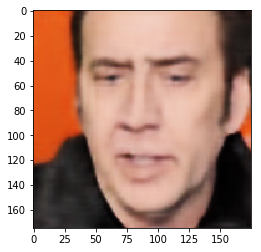

In [20]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([cage[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()


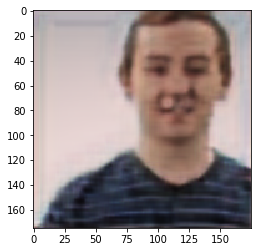

In [21]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([tyler[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()
